**Water Potability Prediction**

Parameters

1. **pH value**: PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. **Hardness**: Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. **Solids** (Total dissolved solids - TDS): Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. **Chloramines**: Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. **Sulfate**: Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. **Conductivity**: Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. **Organic_carbon**: Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. **Trihalomethanes**: THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. **Turbidity**: The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. **Potability**: Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

Importing libraries


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score,roc_auc_score,roc_curve,mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

Combinig Dataset

In [24]:
df0=pd.read_csv('/content/drive/MyDrive/water_potability.csv')
df1=pd.read_csv('/content/drive/MyDrive/train_dataset.csv')
df=pd.concat([df0,df1],ignore_index=True)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
5564,8.124208,207.509515,26489.114701,8.540837,318.059624,431.625677,10.075598,63.984225,4.724457,0
5565,10.391942,262.741770,39116.682706,3.205786,285.728420,473.313969,13.300688,65.318816,5.771715,0
5566,7.790875,196.478712,24061.349596,6.785685,350.117254,471.518536,15.343316,44.544627,3.076214,0
5567,6.139743,168.444214,23894.136010,9.494582,318.026087,494.129125,19.116022,60.264767,3.841222,0


In [25]:
x=df.duplicated().sum()
print(x)

1252


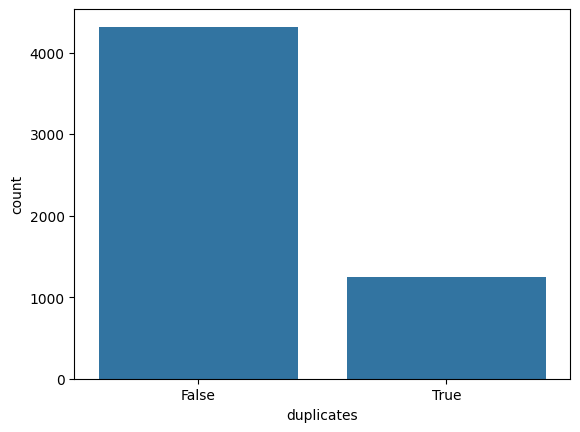

In [26]:
df['duplicates'] = df.duplicated()
sns.countplot(x='duplicates', data=df)
plt.show()


In [27]:
df=df.drop_duplicates()
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,duplicates
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,False
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0,False
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0,False
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,False
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,False
...,...,...,...,...,...,...,...,...,...,...,...
5564,8.124208,207.509515,26489.114701,8.540837,318.059624,431.625677,10.075598,63.984225,4.724457,0,True
5565,10.391942,262.741770,39116.682706,3.205786,285.728420,473.313969,13.300688,65.318816,5.771715,0,True
5566,7.790875,196.478712,24061.349596,6.785685,350.117254,471.518536,15.343316,44.544627,3.076214,0,True
5567,6.139743,168.444214,23894.136010,9.494582,318.026087,494.129125,19.116022,60.264767,3.841222,0,True


In [ ]:
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4317 entries, 0 to 5568
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3826 non-null   float64
 1   Hardness         4317 non-null   float64
 2   Solids           4317 non-null   float64
 3   Chloramines      4317 non-null   float64
 4   Sulfate          3536 non-null   float64
 5   Conductivity     4317 non-null   float64
 6   Organic_carbon   4317 non-null   float64
 7   Trihalomethanes  4155 non-null   float64
 8   Turbidity        4317 non-null   float64
 9   Potability       4317 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 371.0 KB


In [ ]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Missing values

<Axes: >

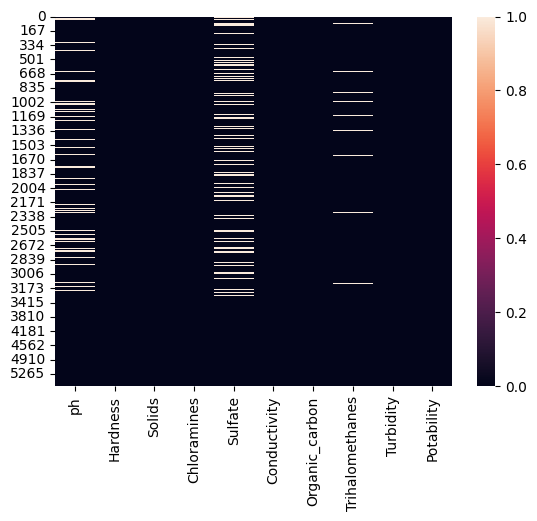

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.076865,-0.087049,-0.029444,0.027903,0.023857,0.047823,-0.003561,-0.038275,-0.010679
Hardness,0.076865,1.000000,-0.046021,-0.028039,-0.089040,-0.041114,-0.001786,-0.012857,-0.001796,-0.016797
Solids,-0.087049,-0.046021,1.000000,-0.075245,-0.158759,0.020556,0.018197,-0.003470,0.023556,0.035517
Chloramines,-0.029444,-0.028039,-0.075245,1.000000,0.050896,-0.010430,-0.014494,0.021797,0.002644,0.023265
Sulfate,0.027903,-0.089040,-0.158759,0.050896,1.000000,-0.010314,0.035687,-0.036704,-0.016833,-0.023089
Conductivity,0.023857,-0.041114,0.020556,-0.010430,-0.010314,1.000000,0.022694,-0.002218,0.002548,-0.007874
Organic_carbon,0.047823,-0.001786,0.018197,-0.014494,0.035687,0.022694,1.000000,-0.022654,-0.027383,-0.025916
Trihalomethanes,-0.003561,-0.012857,-0.003470,0.021797,-0.036704,-0.002218,-0.022654,1.000000,-0.016546,0.004531
Turbidity,-0.038275,-0.001796,0.023556,0.002644,-0.016833,0.002548,-0.027383,-0.016546,1.000000,-0.005882
Potability,-0.010679,-0.016797,0.035517,0.023265,-0.023089,-0.007874,-0.025916,0.004531,-0.005882,1.000000


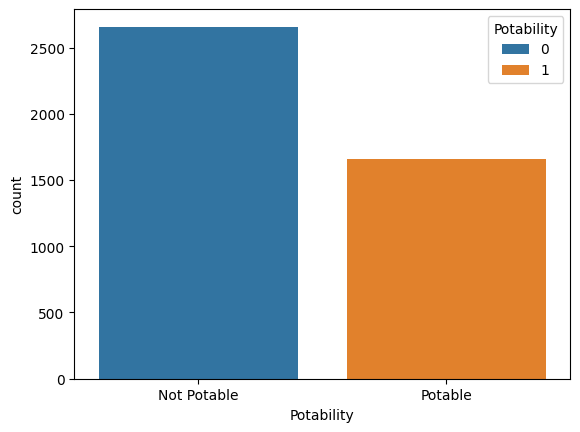

In [ ]:
ax=sns.countplot(x="Potability",data=df,hue='Potability')
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()

In [ ]:
df['Potability'].value_counts()

0    2657
1    1660
Name: Potability, dtype: int64

Imbalanced Data

Outlier Analysis

<Axes: ylabel='ph'>

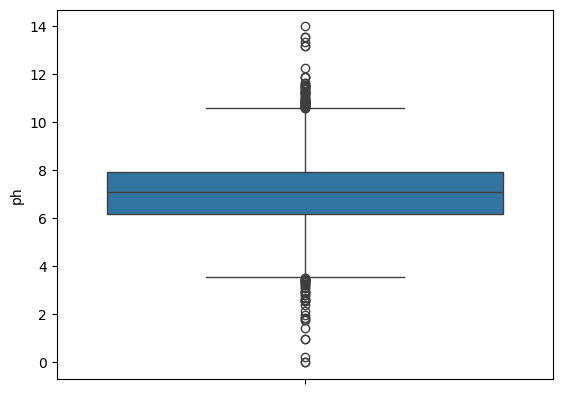

In [ ]:

sns.boxplot(df['ph'])


<Axes: ylabel='Trihalomethanes'>

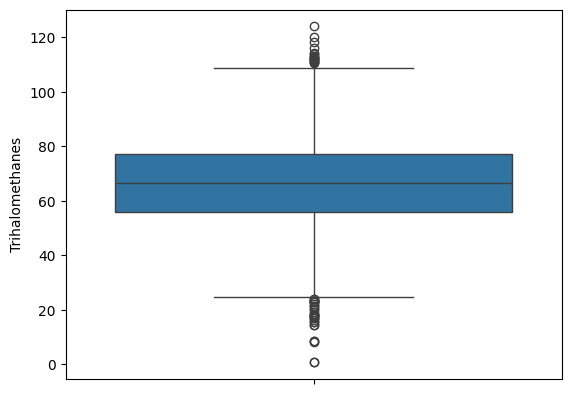

In [ ]:
sns.boxplot(df['Trihalomethanes'])



<Axes: ylabel='Sulfate'>

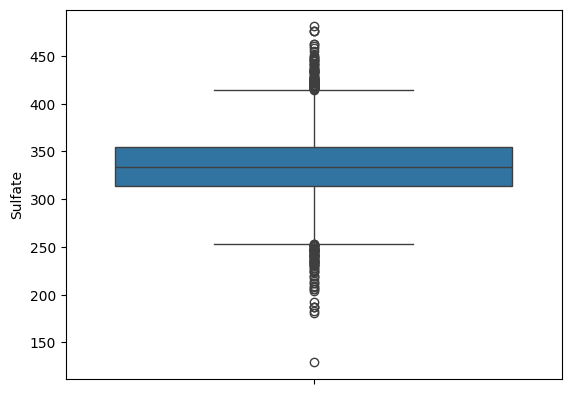

In [ ]:
sns.boxplot(df['Sulfate'])

<Axes: ylabel='Turbidity'>

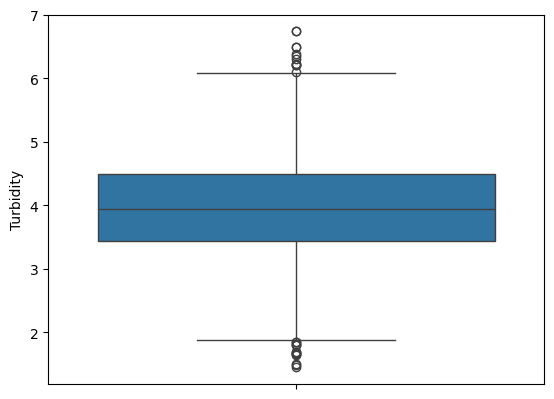

In [ ]:
sns.boxplot(df['Turbidity'])

Missing value Handling

In [ ]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [ ]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4317 entries, 0 to 5568
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               4317 non-null   float64
 1   Hardness         4317 non-null   float64
 2   Solids           4317 non-null   float64
 3   Chloramines      4317 non-null   float64
 4   Sulfate          4317 non-null   float64
 5   Conductivity     4317 non-null   float64
 6   Organic_carbon   4317 non-null   float64
 7   Trihalomethanes  4317 non-null   float64
 8   Turbidity        4317 non-null   float64
 9   Potability       4317 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 371.0 KB


In [ ]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.077605,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.853024,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.853024,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
5559,7.080795,166.404968,14202.193805,9.006796,370.538524,493.440244,12.453160,59.804167,2.848371,1
5561,6.150034,188.413055,8406.723244,7.744714,358.591738,449.358812,13.220295,52.956632,3.444442,1
5562,7.080795,165.892970,11566.875548,8.326155,333.775777,369.289777,7.401868,66.686950,3.603090,1
5563,7.080795,207.391097,25110.037626,6.329791,345.592634,420.219104,22.346415,92.327760,2.739235,0


Splitting Dataset

In [ ]:
X = df.drop(columns='Potability', axis=1)
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.077605,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.853024,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.853024,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
5559,7.080795,166.404968,14202.193805,9.006796,370.538524,493.440244,12.453160,59.804167,2.848371
5561,6.150034,188.413055,8406.723244,7.744714,358.591738,449.358812,13.220295,52.956632,3.444442
5562,7.080795,165.892970,11566.875548,8.326155,333.775777,369.289777,7.401868,66.686950,3.603090
5563,7.080795,207.391097,25110.037626,6.329791,345.592634,420.219104,22.346415,92.327760,2.739235


In [ ]:
y=df['Potability']
y

0       0
1       0
2       0
3       0
4       0
       ..
5559    1
5561    1
5562    1
5563    0
5568    1
Name: Potability, Length: 4317, dtype: int64

SMOTE Over Sampling since dataset is imbalanced

In [ ]:
sm=SMOTE(random_state=3)
X,y=sm.fit_resample(X,y)
X.shape,y.shape

((5314, 9), (5314,))

In [ ]:
y=pd.Series(y)
y.value_counts()

0    2657
1    2657
Name: Potability, dtype: int64

PreProcessing

In [ ]:
mms=MinMaxScaler()
X=mms.fit_transform(X)
X

array([[0.50554324, 0.57113901, 0.33609646, ..., 0.31340165, 0.69975313,
        0.28609102],
       [0.26543429, 0.29740043, 0.30061142, ..., 0.49731851, 0.4509993 ,
        0.57679264],
       [0.57850887, 0.64131081, 0.32161885, ..., 0.56201674, 0.5328657 ,
        0.30363656],
       ...,
       [0.54460767, 0.63159111, 0.21034557, ..., 0.44595965, 0.51885935,
        0.61383739],
       [0.50782497, 0.53571875, 0.30613201, ..., 0.48836757, 0.6417659 ,
        0.5701673 ],
       [0.50562201, 0.42067894, 0.53433868, ..., 0.32994916, 0.65542063,
        0.40170262]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)
y_train.shape,X_train.shape

((3719,), (3719, 9))

Model Building


1.   KNN



              precision    recall  f1-score   support

           0       0.73      0.67      0.70       811
           1       0.68      0.75      0.71       784

    accuracy                           0.71      1595
   macro avg       0.71      0.71      0.71      1595
weighted avg       0.71      0.71      0.71      1595



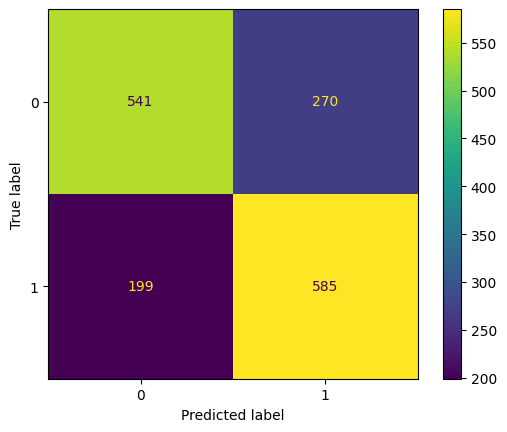

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
k=(accuracy_score(y_test,y_pred))

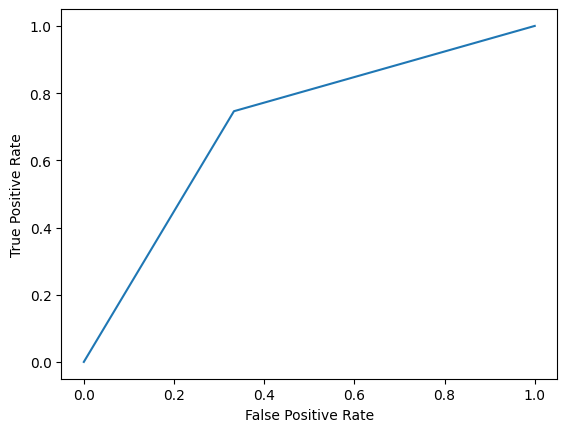

0.7066255756309923


In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.plot(k,color='red',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print(roc_auc_score(y_test,y_pred))


     

2.   RandomForest






              precision    recall  f1-score   support

           0       0.82      0.80      0.81       811
           1       0.80      0.82      0.81       784

    accuracy                           0.81      1595
   macro avg       0.81      0.81      0.81      1595
weighted avg       0.81      0.81      0.81      1595



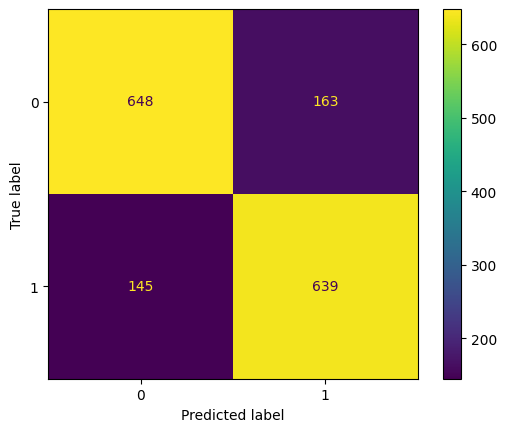

In [ ]:
Nrf=RandomForestClassifier(random_state=3)
Nrf.fit(X_train,y_train)
y_rf=Nrf.predict(X_test)
print(classification_report(y_test,y_rf))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_rf))
r=accuracy_score(y_test,y_rf)

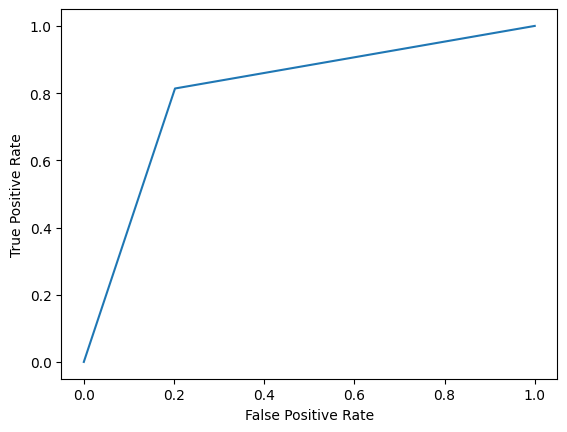

0.8057780140416216


In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_rf)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print(roc_auc_score(y_test,y_rf))


In [ ]:
Nrf.predict(mms.transform([[9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075]]))

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-207-56e58b6172bc>, line 1)



3.   SVC




              precision    recall  f1-score   support

           0       0.69      0.65      0.67       811
           1       0.66      0.69      0.68       784

    accuracy                           0.67      1595
   macro avg       0.67      0.67      0.67      1595
weighted avg       0.67      0.67      0.67      1595



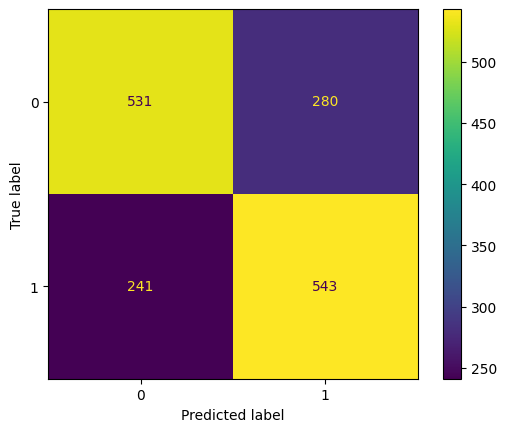

In [ ]:
sv=SVC(random_state=3,probability=True)
sv.fit(X_train,y_train)
y_sv=sv.predict(X_test)
print(classification_report(y_test,y_sv))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_sv))
s=accuracy_score(y_test,y_sv)

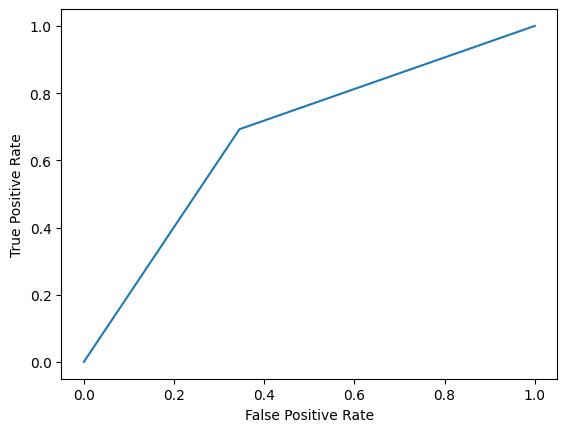

0.6736746332318377


In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_sv)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print(roc_auc_score(y_test,y_sv))



4.   DecisionTree



              precision    recall  f1-score   support

           0       0.74      0.72      0.73       811
           1       0.72      0.74      0.73       784

    accuracy                           0.73      1595
   macro avg       0.73      0.73      0.73      1595
weighted avg       0.73      0.73      0.73      1595



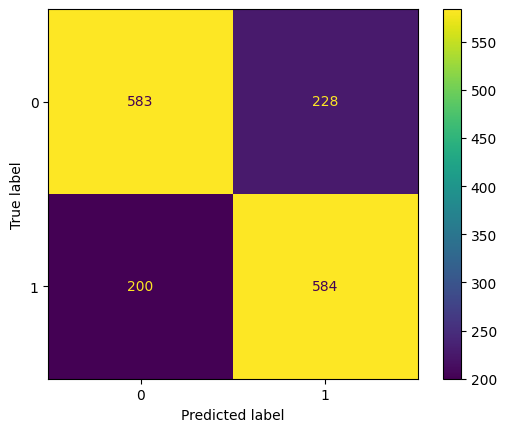

In [ ]:
dt=DecisionTreeClassifier(random_state=3)
dt.fit(X_train,y_train)
y_dt=dt.predict(X_test)
print(classification_report(y_test,y_dt))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_dt))
d=accuracy_score(y_test,y_dt)

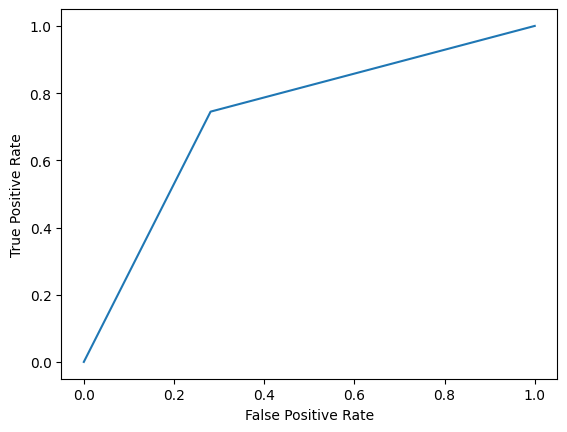

0.7318817786054004


In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_dt)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print(roc_auc_score(y_test,y_dt))



5.   AdaBoost



              precision    recall  f1-score   support

           0       0.61      0.57      0.59       811
           1       0.58      0.62      0.60       784

    accuracy                           0.60      1595
   macro avg       0.60      0.60      0.60      1595
weighted avg       0.60      0.60      0.60      1595



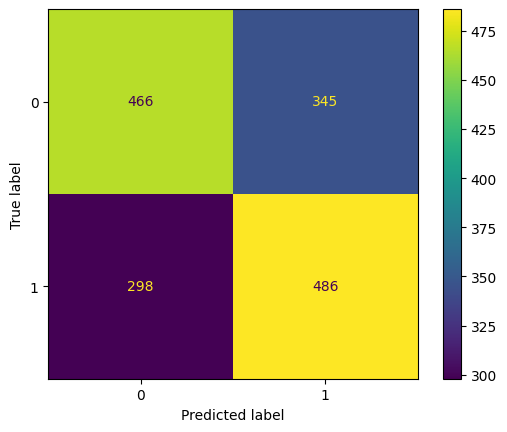

In [ ]:
ad=AdaBoostClassifier(random_state=3)
ad.fit(X_train,y_train)
y_ad=ad.predict(X_test)
print(classification_report(y_test,y_ad))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_ad))
a=accuracy_score(y_test,y_ad)

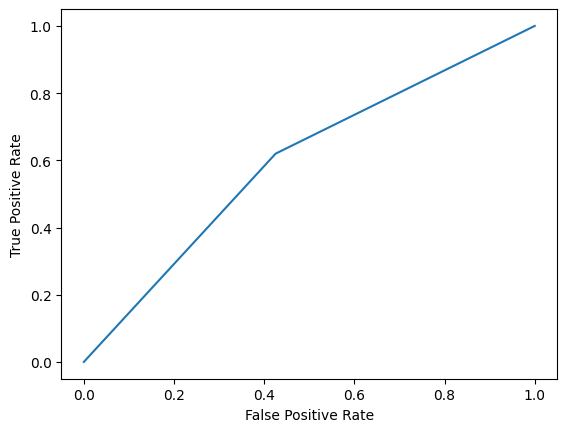

0.59724860967815


In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_ad)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print(roc_auc_score(y_test,y_ad))

6.Linear Regression


0.4031347962382445


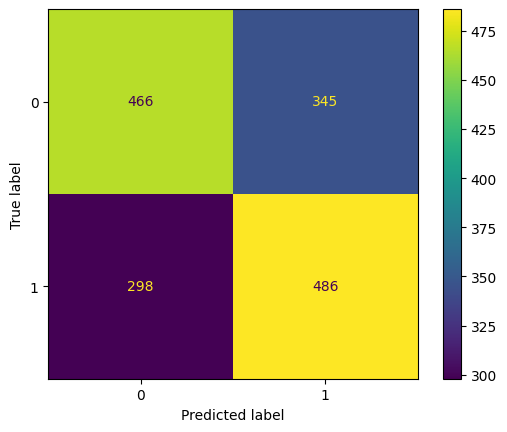

In [ ]:
mlr=LinearRegression()
mlr.fit(X_train,y_train)
y_lr=mlr.predict(X_test)
print(mean_absolute_error(y_test,y_ad))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_ad))
l=r2_score(y_test,y_ad)


In [ ]:
print(l)

-0.6130013966128995


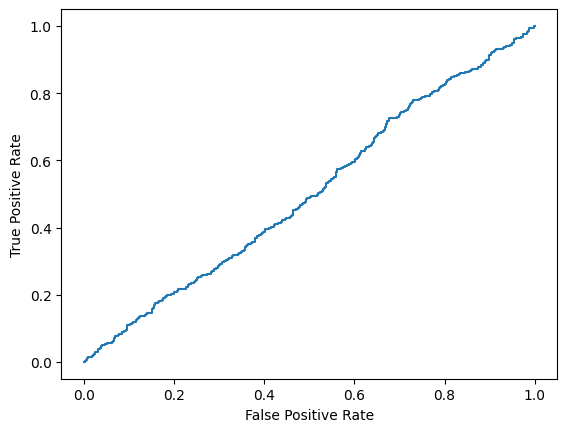

0.5034632225269886


In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_lr)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print(roc_auc_score(y_test,y_lr))

In [ ]:
accuracy=[k,r,s,d,a]
models=['KNN','RF','SVC','DT','ABC']
dff=pd.DataFrame({'M':models,'Acc':accuracy})
dff

,M,Acc
0,KNN,0.705956
1,RF,0.805643
2,SVC,0.673354
3,DT,0.731661
4,ABC,0.596865


**Accuracy Comparison for Each Model**

     M       Acc
0  KNN  0.705956
1   RF  0.805643
2  SVC  0.673354
3   DT  0.731661
4  ABC  0.596865


<Axes: xlabel='Acc', ylabel='M'>

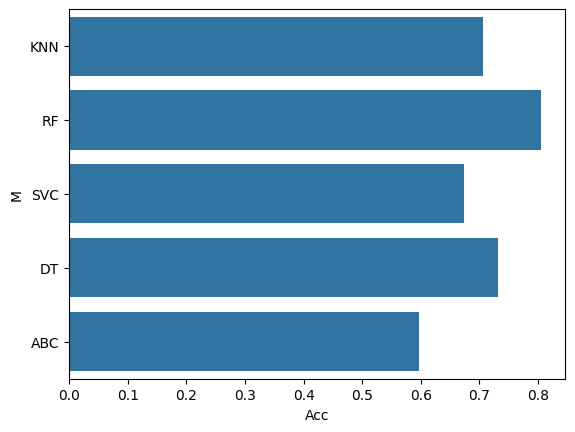

In [ ]:
print(dff)
sns.barplot(x='Acc', y='M', data=dff)

Accuracy and model correlation

<Axes: xlabel='M', ylabel='Acc'>

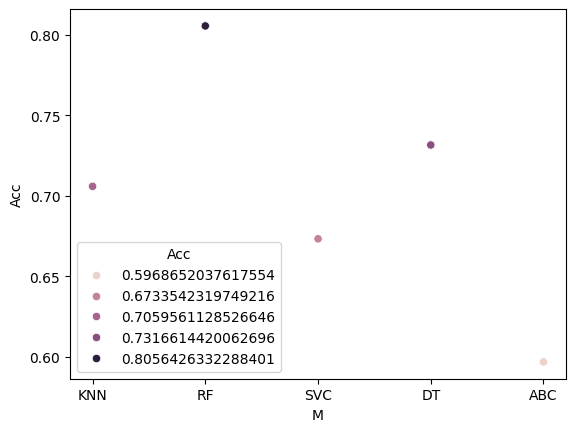

In [ ]:
sns.scatterplot(x="M", y="Acc", hue="Acc", data=dff)

HyperParameterTuning RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
params={
    'n_estimators': [100,200,300,400],
    'max_features': ['auto','sqrt','log2'],
    'criterion' :['gini','entropy']
    }
clf=GridSearchCV(Nrf,params,cv=5,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [ ]:
print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 200}


              precision    recall  f1-score   support

           0       0.82      0.80      0.81       811
           1       0.80      0.82      0.81       784

    accuracy                           0.81      1595
   macro avg       0.81      0.81      0.81      1595
weighted avg       0.81      0.81      0.81      1595



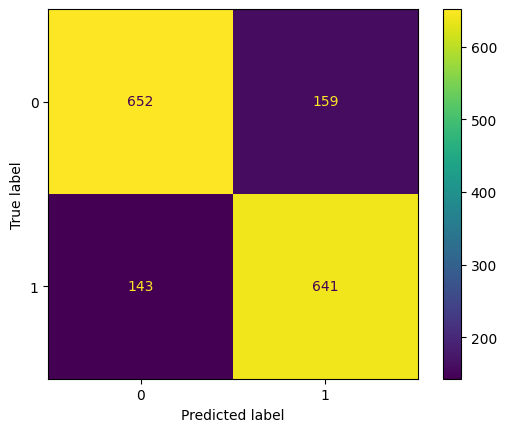

In [ ]:
rf=RandomForestClassifier(random_state=42
                        ,max_features='auto',criterion='gini',n_estimators=200)
rf.fit(X_train,y_train)
y_p=rf.predict(X_test)
print(classification_report(y_test,y_p))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_p))
a=accuracy_score(y_test,y_p)

In [ ]:
a

0.8106583072100313

In [ ]:
z=pd.DataFrame({'RF':r,'HyperRF':a},index=['row2'])
z

,RF,HyperRF
row2,0.805643,0.810658


In [ ]:
import pickle
pickle.dump(rf,open('HyperRF.sav','wb'))
pickle.dump(mms,open('mms.sav','wb'))
